In [1]:
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("/Users/terlau/LNDG/EyeMem/PyDDM/sdt_df.pkl")
df['subject'] = df['subject'].str.replace('sub-', '')
df.rename(columns={'subject':'subjects'}, inplace=True)
df

,dprime_1,dprime_2,dprime_3,dprime_4,dprime_5,RT_1,RT_2,RT_3,RT_4,RT_5,criterion_1,criterion_2,criterion_3,criterion_4,criterion_5,group,subjects,avg_dprime,avg_RT,avg_criterion
0,3.002172,2.831685,2.576005,3.289707,3.289707,0.740367,0.754833,0.795833,0.734000,0.780633,-0.000000,0.229011,0.177231,2.220446e-16,2.220446e-16,young,09,2.997855,0.761133,0.081248
1,2.831685,2.615583,3.110087,2.532000,2.615583,0.663300,0.817448,0.816100,0.837767,0.804600,0.229011,0.157442,-0.089810,3.788535e-01,1.574422e-01,young,10,2.740988,0.787843,0.166588
3,1.898201,2.067035,2.755625,1.941988,1.541499,1.087700,1.435567,1.156586,1.295200,1.321897,-0.695753,-0.467569,-0.267041,-1.793554e-01,-3.400222e-01,old,12,2.040870,1.259390,-0.389948
4,3.145940,1.610907,2.486475,0.000000,2.075581,1.252367,1.558800,1.155000,0.000000,1.543679,-0.071884,1.028461,0.401616,0.000000e+00,6.070632e-01,old,13,1.863780,1.101969,0.393051
5,2.612908,2.611858,3.145940,3.289707,1.886665,0.925700,0.960033,0.863867,1.058133,1.338643,0.119623,0.195157,0.071884,2.220446e-16,-2.070167e-01,old,14,2.709416,1.029275,0.035929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2.486475,2.486475,2.568656,-0.336999,1.802164,1.231793,1.274000,1.226500,1.449842,1.389778,-0.401616,0.401616,0.216758,8.484768e-02,7.437715e-01,young,97,1.801354,1.314383,0.209075
89,2.436492,2.206908,2.999354,2.755625,3.002172,0.808933,0.698333,0.682467,0.841000,0.813267,0.426608,-0.083378,-0.034443,-2.670410e-01,-0.000000e+00,young,98,2.680110,0.768800,0.008349
90,2.352380,2.966320,2.831685,2.486475,2.342707,1.181621,1.448207,1.040100,1.359241,1.483893,0.289044,0.017926,0.229011,4.016162e-01,3.297324e-01,old,99,2.595913,1.302612,0.253466
91,2.178342,2.267779,1.272349,1.094968,1.952393,1.307897,1.408357,1.203852,1.239778,1.430333,-0.021601,-0.510964,-0.205447,2.941371e-01,1.345752e-01,old,100,1.753166,1.318043,-0.061860


In [3]:
#df.set_index('subject', inplace=True)
#df
df['subjects'] = df['subjects'].astype(str).astype(int)

In [4]:
df_10 = pd.read_pickle('fitted_pyddm_cb_10_test')
df_10
#df_10.set_index('subjects', inplace=True)
#df_10

,subjects,age,drift,driftbias,boundary,tau,startbias,nondec,fit,loss
0,9,0,1.058135,0.046951,1.400000,2.816976,0.005344,0.466511,-69.558534,BIC
1,10,0,1.190093,0.203545,0.690000,0.932260,0.014482,0.533815,38.982864,BIC
2,12,1,0.982652,0.505930,0.680099,0.573470,-0.084920,0.619391,168.847291,BIC
3,13,1,0.432959,0.006199,1.000000,1.135168,0.040534,0.618711,297.761716,BIC
4,14,1,0.645256,-0.036592,0.703459,0.544768,0.060164,0.507808,180.236474,BIC
...,...,...,...,...,...,...,...,...,...,...
79,97,0,0.538083,0.144434,0.789686,0.529090,-0.023287,0.480709,350.117612,BIC
80,98,0,0.761296,0.722031,0.942011,1.980464,-0.105613,0.457107,40.085966,BIC
81,99,1,0.382910,-0.446324,0.782865,0.990520,0.129782,0.477453,173.493029,BIC
82,100,1,0.375714,-0.169998,0.611664,0.455202,0.063024,0.583994,159.724672,BIC


In [ ]:
# subject 63 is missing!
t = df['subjects'].tolist()

In [ ]:
#df_10.index[47]
#df_10.loc[df_10['subjects'] == 63]

In [5]:
df_10 = df_10.dropna()
df_10.drop(df_10.index[47], inplace=True)
df_10

,subjects,age,drift,driftbias,boundary,tau,startbias,nondec,fit,loss
0,9,0,1.058135,0.046951,1.400000,2.816976,0.005344,0.466511,-69.558534,BIC
1,10,0,1.190093,0.203545,0.690000,0.932260,0.014482,0.533815,38.982864,BIC
2,12,1,0.982652,0.505930,0.680099,0.573470,-0.084920,0.619391,168.847291,BIC
3,13,1,0.432959,0.006199,1.000000,1.135168,0.040534,0.618711,297.761716,BIC
4,14,1,0.645256,-0.036592,0.703459,0.544768,0.060164,0.507808,180.236474,BIC
...,...,...,...,...,...,...,...,...,...,...
79,97,0,0.538083,0.144434,0.789686,0.529090,-0.023287,0.480709,350.117612,BIC
80,98,0,0.761296,0.722031,0.942011,1.980464,-0.105613,0.457107,40.085966,BIC
81,99,1,0.382910,-0.446324,0.782865,0.990520,0.129782,0.477453,173.493029,BIC
82,100,1,0.375714,-0.169998,0.611664,0.455202,0.063024,0.583994,159.724672,BIC


In [11]:
x = df['avg_criterion']
y = df_10['driftbias']

In [6]:
import scipy.stats
print(scipy.stats.pearsonr(df['avg_criterion'], df_10['driftbias']))
print(scipy.stats.spearmanr(df['avg_criterion'], df_10['driftbias']))
print(scipy.stats.kendalltau(df['avg_criterion'], df_10['driftbias']))

(-0.05962674326807903, 0.5923291042713636)
SpearmanrResult(correlation=0.010599890852609043, pvalue=0.9242292725502752)
KendalltauResult(correlation=0.020863943579194827, pvalue=0.7800739973769123)


In [7]:
df['avg_criterion'].corr(df_10['driftbias'])

0.16487342245571973

In [8]:
slope, intercept, r, p, stderr = scipy.stats.linregress(df['avg_criterion'], df_10['driftbias'])

In [9]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=0.01+-0.07x, r=-0.06'

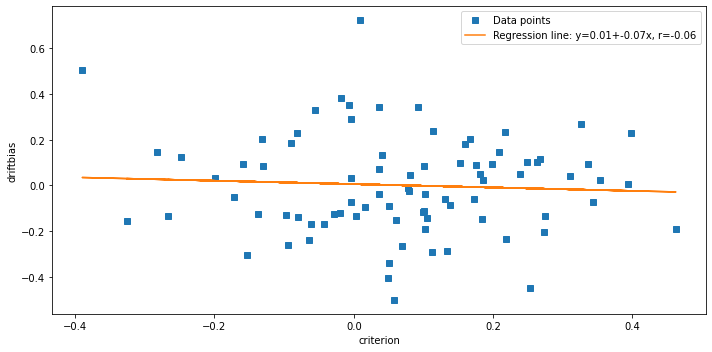

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['avg_criterion'], df_10['driftbias'], linewidth=0, marker='s', label='Data points')
ax.plot(df['avg_criterion'], intercept + slope * df['avg_criterion'], label=line)
ax.set_xlabel('criterion')
ax.set_ylabel('driftbias')
ax.legend(facecolor='white')
plt.tight_layout()
plt.show()


In [13]:
corr_matrix = np.corrcoef(x,y).round(decimals=2)

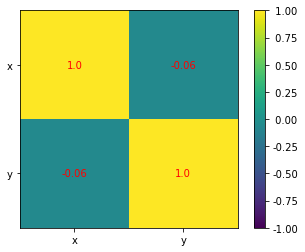

In [16]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [17]:
t, p = stats.ttest_ind(df['avg_criterion'],df_10['driftbias'])
print(t,p)

2.2342099895564065 0.026820892778307376


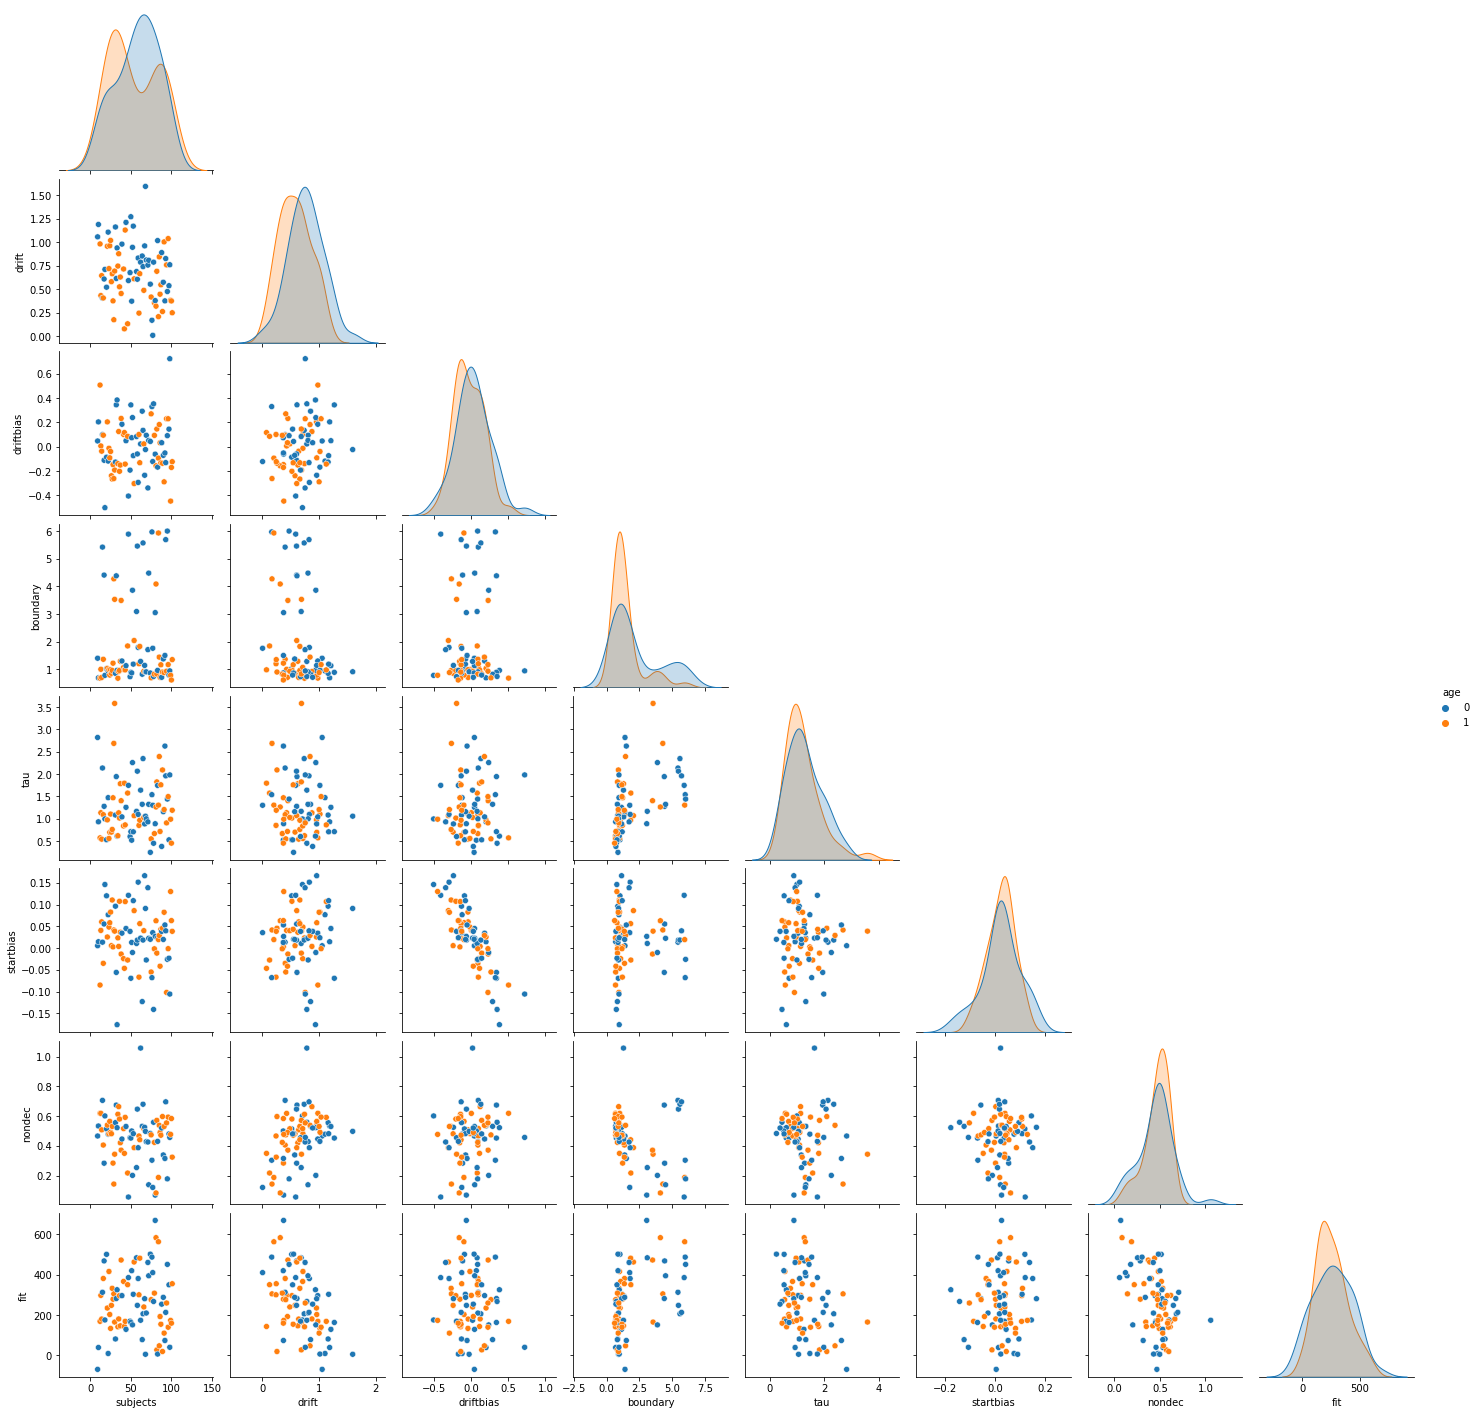

In [18]:
import seaborn as sns
sns.pairplot(df_10, hue="age", corner=True)